In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

100%|██████████| 4/4 [00:00<00:00, 99.95it/s]


[2000.0]
[2000.0, 3000.0]
[2000.0, 3000.0, 1000.0]
[0.0023026197248000053, 0.00027299583720000084, 0.001583161910800005]


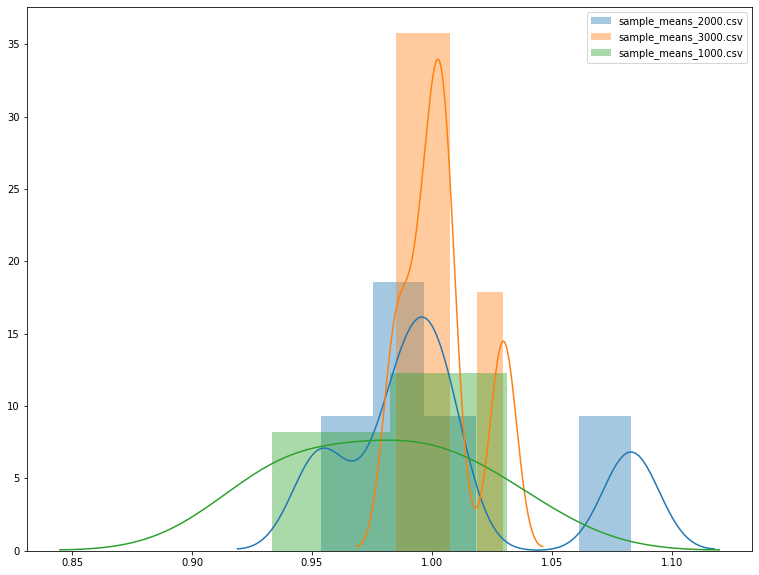

(0, 0.003)

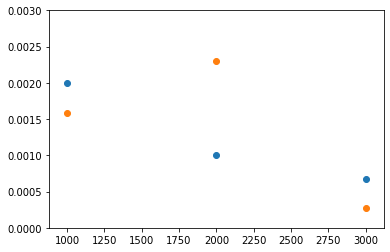

In [13]:
directory = "output"
fig = plt.subplots(nrows = 1, ncols = 1, sharex = False, sharey = False, figsize = (13, 10))
var1=[]
var2=[]
l=[]
for root,dirs,files in os.walk(directory):
    for file in tqdm(files):
        if file.endswith(".csv") and file.startswith("sample"):
            file_path = os.path.join(directory,file)
            df= pd.read_csv(file_path)
            
            sns.distplot(df.iloc[1:,:],label=file)
            
            l.append((float)(file.split("_")[-1].split(".")[0]))
            var1.append(df.iloc[0,0]/(float)(file.split("_")[-1].split(".")[0]))
            var2.append(df.iloc[1:,0].var())
            print(l)
print(var2)
plt.legend()
plt.show()
plt.scatter(l,var1)
plt.scatter(l,var2)
plt.ylim(0,0.003)

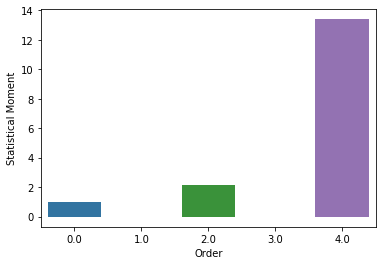

In [11]:
df=pd.read_csv("output/moments.csv",header=None)
df_separated=df.iloc[1:,0].str.split(pat=";",expand=True).astype(float)
df_separated.columns= df.iloc[0,0].split(";")
#df_separated['Statistical Moment']=df.iloc[:,0].str.split(pat=";",expand=True)[1].astype(float)

sns.barplot(x=df_separated['Order'], y =df_separated['Statistical Moment'])


In [12]:
df_separated

,Order,Statistical Moment
1,0.0,1.000000
2,1.0,-0.026620
3,2.0,2.109021
4,3.0,-0.003859
5,4.0,13.402150
